<a href="https://colab.research.google.com/github/pedro-hernandez-esquivias/Programacion/blob/main/Pr%C3%A1ctica_2_FeatEng_Incompleta_Pedro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2 Feature Engineering

## Instalación y carga de librerías

La librería ucimlrepo es una librería de Python orientada a la carga de dataset de la fuente de datos  UCI Machine Learning Repository, que es una colección popular de conjuntos de datos utilizada con frecuencia en el ámbito de la inteligencia artificial y el aprendizaje automático para probar algoritmos y modelos

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Carga de datos

Cargamos los datos del enunciado de la práctica, asociados a clientes de un banco durante el lanzamiento de una determinada campaña comercial. Es el dataset con id 222 de la librería UCI ML Repo y utilizamos su atributo "data.features" para obtener el objeto dataframe Pandas asociado a dicha fuente de datos. Las variables de la BBDD son las siguientes:

**age:** Edad del cliente

**job:** Tipo de empleo del cliente

**marital:** Estado civil del cliente

**education:** Nivel educativo del cliente

**default:** Si el cliente tiene crédito en incumplimiento

**balance:** Saldo promedio anual en euros en la cuenta del cliente.

**housing:** Si el cliente tiene un préstamo hipotecario

**loan:** Si el cliente tiene un préstamo personal

**contact:** Método de contacto del cliente

**day_of_week:** Día de la semana del último contacto con el cliente

**month:** Mes del último contacto con el cliente

**duration:** Duración del último contacto en segundos

**campaign:** Número de contactos realizados durante esta campaña

**pdays:** Número de días que pasaron desde el último contacto (-1 significa que el cliente no fue contactado previamente)

**previous:** Número de contactos realizados antes de esta campaña

**poutcome:** Resultado de la campaña de marketing anterior

In [ ]:
bank_marketing = fetch_ucirepo(id=222)

In [ ]:
df = bank_marketing.data.features

Utilizamos los comandos básicos que ya conocemos para entender el contenido de nuestra fuente de datos

In [ ]:
# Mostrar la tabla
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [ ]:
# Mostrar elementos estadísticos
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


En este caso topamos con ciertos valores que no nos habáimos encontrado anteriormente. Son los valores missing, en este caso representados por NaN (Not a Number). Se corresponde con información que no se tiene para ciertos registros. A continuación establecemos un método para contar cuantos missing tenemos en total. Utilizamos para cada columna un filtro: df[df[col].isna()]

In [ ]:
# Mostrar los valores Missing por cada columna
for col in df.columns:

  print('La columna '+col+' tiene '+str(df[df[col].isna()].shape[0])+' missing')

La columna age tiene 0 missing
La columna job tiene 288 missing
La columna marital tiene 0 missing
La columna education tiene 1857 missing
La columna default tiene 0 missing
La columna balance tiene 0 missing
La columna housing tiene 0 missing
La columna loan tiene 0 missing
La columna contact tiene 13020 missing
La columna day_of_week tiene 0 missing
La columna month tiene 0 missing
La columna duration tiene 0 missing
La columna campaign tiene 0 missing
La columna pdays tiene 0 missing
La columna previous tiene 0 missing
La columna poutcome tiene 36959 missing


Como segundo método podemos utilizar la suma de valores missing

In [ ]:
# ¿Otro método para mostrar los valores missing?
df.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

Vemos que el resultado coincide en ambos casos. Introducimos ahora una nueva sentencia (dtypes), que declara el tipo de variable para cada una de las columnas de nuestro dataframe

In [ ]:
# ¿Cómo podemos ver la tipología de los elementos de la tabla?
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

Sobre la primera cuestión planteada, podemos identificar en primera instancia las columnas a las que podríamos aplicar la binarización como aquellas que son variables continuas (no tiene sentido hacer una discretización sobre variables discretas, en todo caso una agrupación de clases). En este caso serían: **age, balance, day_of_week, duration, campaign, pdays, previous**

En segundo lugar debemos plantearnos el contexto de aplicación: qué me va a aportar realizar una binarización. En este caso no estamos tratando en principio ningún modelo por lo que nuestro objetivo será informativo: queremos aplicar binarización a ciertas característica para poder pasar de unos datos mal distribuidos a una información fácil de interpretar y útil en nuestros análisis.

Siguiendo esta premisa, lo que haremos será dibujar histogramas para entender la distribución (más allá de la idea incial que nos proporcionó el método describe)



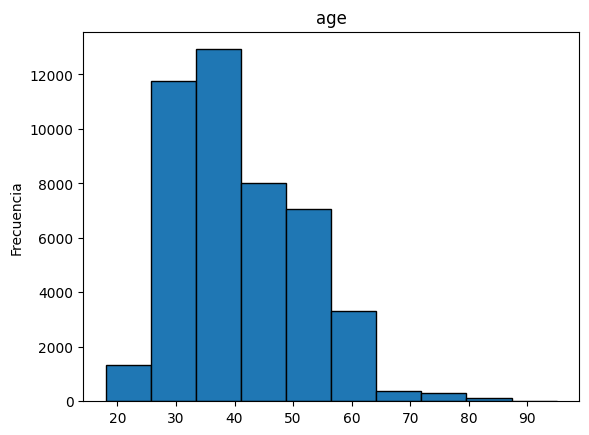

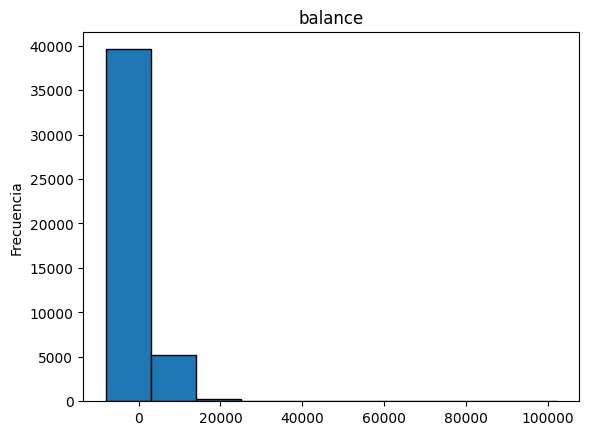

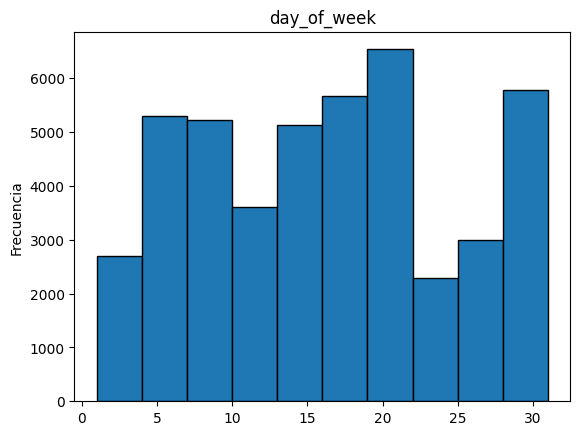

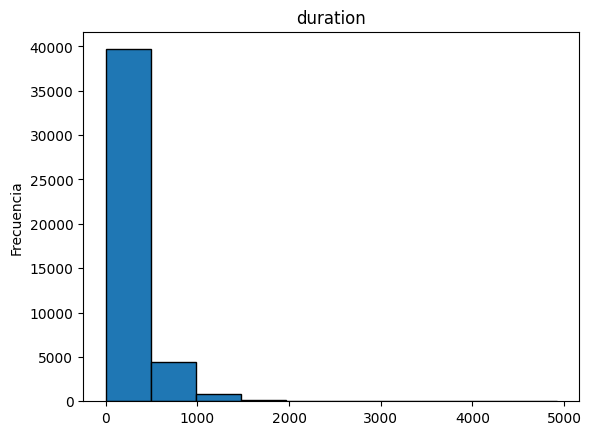

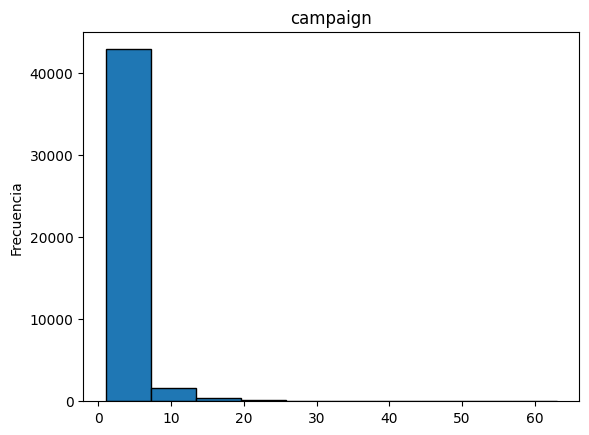

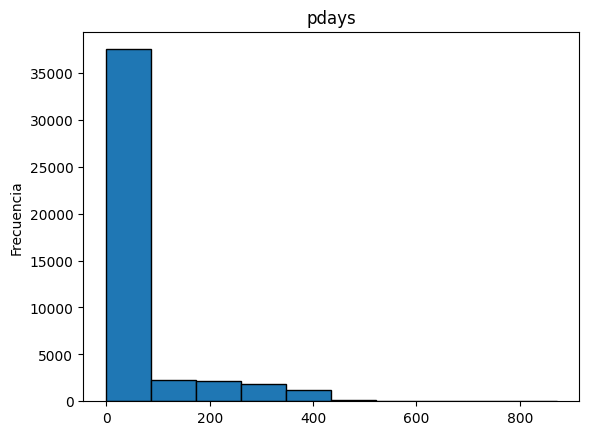

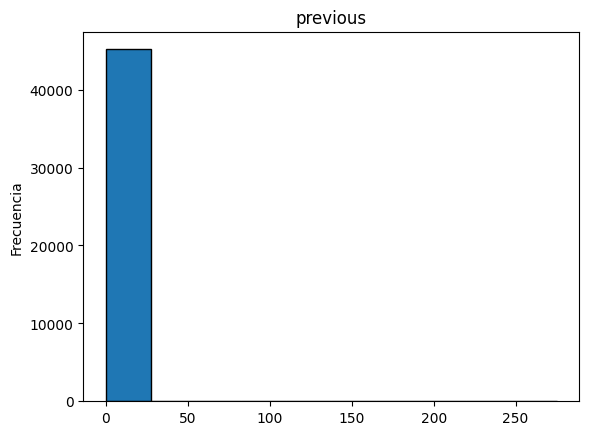

In [ ]:
# Mostrar los histogramas para estudiar las distribuciones de las variables
columnas_numericas = ['age','balance','day_of_week','duration','campaign','pdays','previous']
for col in columnas_numericas:
  plt.hist(df[col],edgecolor='black')
  plt.title(col)
  plt.ylabel('Frecuencia')
  plt.show()

En este caso una de las posibles soluciones es tomar la variable duration (duración del último contacto en segundos). En general el histograma indica que el contacto con los clientes no tiene una duración elevada pero podemos hacer una binarización probando diferentes umbrales para obtener una visión mas detallada de como se distribuye la variable en nuestra base de datos

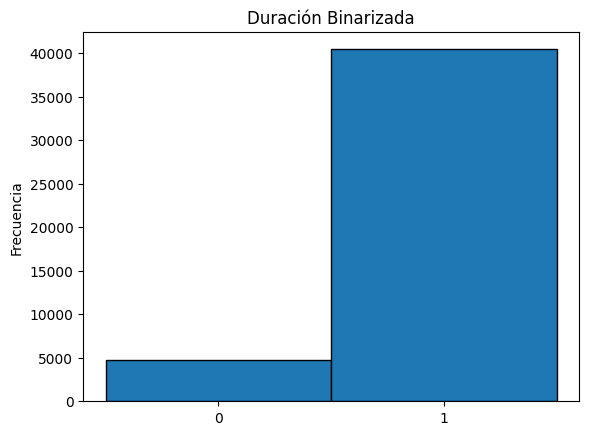

In [ ]:
# Esocge una binarización ¿Cómo actua esta binarización sobre la distribución?
df['duration_bin'] = np.where(df['duration']>60,1,0)

plt.hist(df['duration_bin'],bins=[-0.5,0.5, 1.5],edgecolor='black')
plt.xticks([0,1], ['0', '1'])
plt.title('Duración Binarizada')
plt.ylabel('Frecuencia')
plt.show()

Vemos que la mayoría de llamadas duran más de 60 segundos, probemos con 120

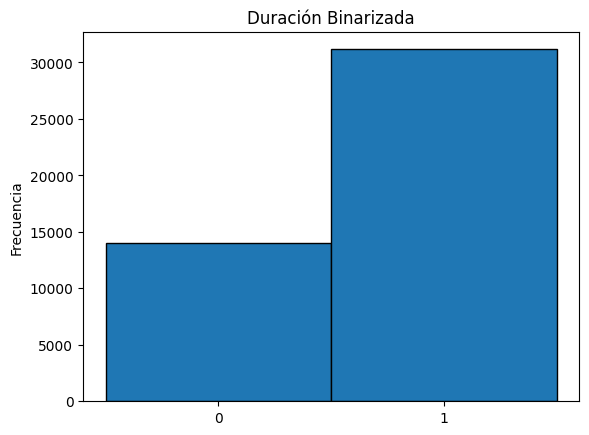

In [ ]:
# Estabilizar la variación
df['duration_bin'] = np.where(df['duration']>120,1,0)

plt.hist(df['duration_bin'],bins=[-0.5,0.5, 1.5],edgecolor='black')
plt.xticks([0,1], ['0', '1'])
plt.title('Duración Binarizada')
plt.ylabel('Frecuencia')
plt.show()

Vamos equilibrando los valores, probemos con 180 segundos

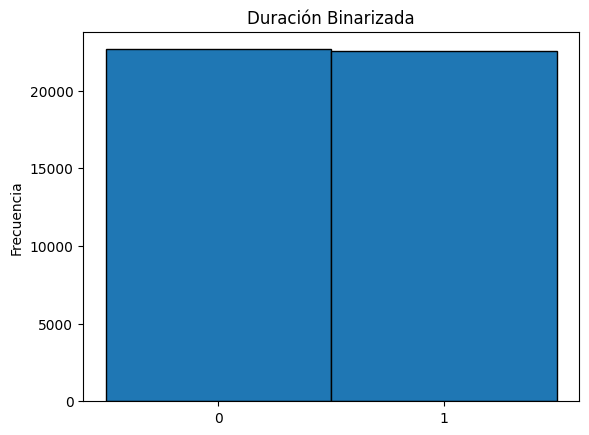

In [ ]:
df['duration_bin'] = np.where(df['duration']>180,1,0)

plt.hist(df['duration_bin'],bins=[-0.5,0.5, 1.5],edgecolor='black')
plt.xticks([0,1], ['0', '1'])
plt.title('Duración Binarizada')
plt.ylabel('Frecuencia')
plt.show()

Vemos que hemos dado con un valor que divide casi de forma perfecta nuestro conjunto de datos. En binarización, no es necesario escoger un umbral que divida en dos nuestra variable, simplemente necesitamos una caracterización mediante la cual podamos distinguir e identificar la información que tenemos. Para no tener que duplicar código podemos crear una función de Python que nos calcule un histograma a partir de un dataframe, una variable y un umbral

In [ ]:
# TIP Extra ¿Hay alguna manera de evitar repetir siempre el mismo código?
def binarizacion(df_input,var,umbral):

  df_input[var+'_bin']=np.where(df_input[var]>umbral,1,0)

  plt.hist(df_input[var+'_bin'],bins=[-0.5,0.5, 1.5],edgecolor='black')
  plt.xticks([0,1], ['0', '1'])
  plt.title(var+' Binarizada')
  plt.ylabel('Frecuencia')
  plt.show()

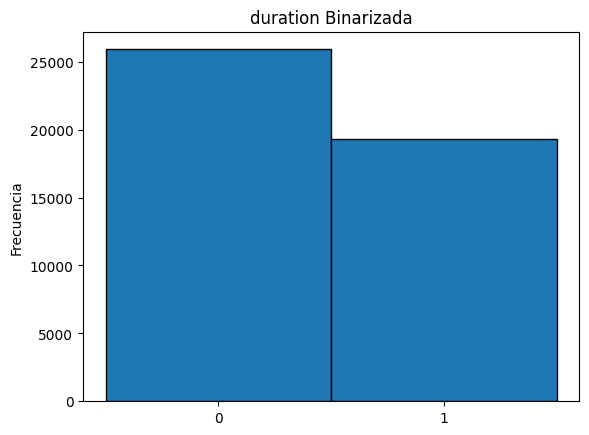

In [ ]:
binarizacion(df,'duration',210)

Con respecto a la segmentación, estableciendo diferentes puntos de vista o casos de uso podríamos hacer una transformación de varias de las columnas continuas. En este caso nos fijaremos en un aspecto clave de medición de la rentabilidad de un cliente: el saldo promedio anual (balance). Mostramos de nuevo el histograma

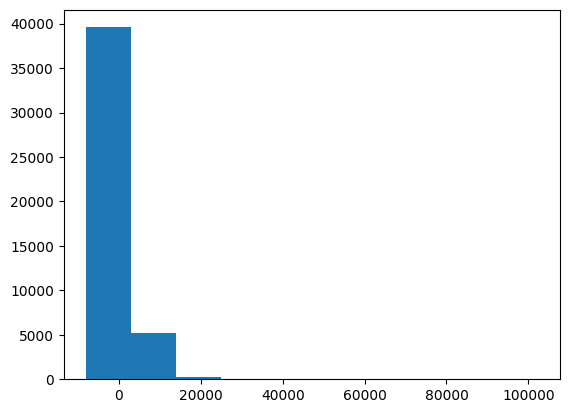

In [ ]:
# Exponer el saldo promedio del cliente ¿Qué podemos observar?
plt.hist(df['balance'])
plt.show()

Con el gráfico no podemos hacernos la idea de posibles tramos de salarios entre nuestros clientes. Vamos a realizar una primera instancia de segmentación de ancho fijo por miles de euros

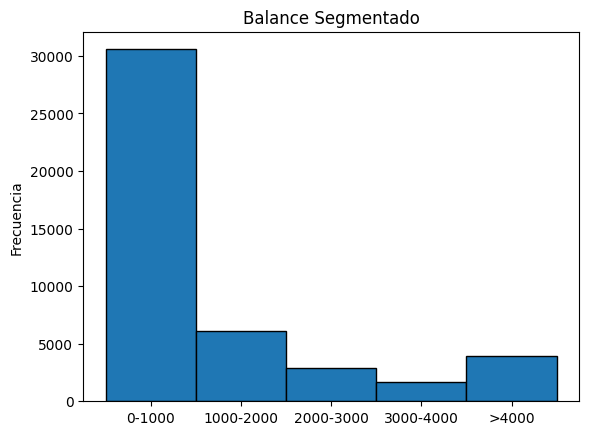

In [ ]:
# Segmentar el salario promedio del cliente en varios bloques con la finalidad de poder analizarlo
df['balance_seg']=np.where(df['balance']<1000,1,np.where(df['balance']<2000,2,np.where(df['balance']<3000,3,np.where(df['balance']<4000,4,5))))

plt.hist(df['balance_seg'],bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],edgecolor='black')
plt.xticks([1,2,3,4,5], ['0-1000', '1000-2000','2000-3000','3000-4000','>4000'])
plt.title('Balance Segmentado')
plt.ylabel('Frecuencia')
plt.show()

Ahora tenemos una idea un poco más realista del salario de nuestros clientes. Pasamos a realizar una función de Python que nos segmente la variable por cuantiles. Por definición de cuantil obtendremos histogramas planos, con lo cual el hecho de dibujarlos no nos aportará nada gráficamente hablando. Por ello, prescindimos de la visión gráfica para tomar una visión analítica

Podemos utilizar directamente la función qcut de la librería Pandas para dividir nuestro df en cuantiles y aplicar el value_counts para entender la distribución de valores

In [ ]:
#En vez de hacerlo por bloques manuales, ¿Es posible hacerlo por cuantiles?
df['balance_seg'] = pd.qcut(df['balance'], q=4)

In [ ]:
df['balance_seg'].value_counts()

(-8019.001, 72.0]     11317
(448.0, 1428.0]       11306
(1428.0, 102127.0]    11297
(72.0, 448.0]         11291
Name: balance_seg, dtype: int64

Podemos extender el uso del qcut en una función personalizada

In [ ]:
def segmentacion(df_input,var,n):

  df_input[var+'_seg']=pd.qcut(df[var], q=n)

  return df[var+'_seg'].value_counts()

In [ ]:
segmentacion(df,'balance',10)

(-8019.001, 0.0]      7280
(22.0, 131.0]         4544
(701.0, 1126.0]       4526
(448.0, 701.0]        4522
(1859.0, 3574.0]      4521
(3574.0, 102127.0]    4521
(131.0, 272.0]        4516
(1126.0, 1859.0]      4513
(272.0, 448.0]        4495
(0.0, 22.0]           1773
Name: balance_seg, dtype: int64

El hecho de que todos los valores iguales tengan que estar dentro de un mismo cuantil genera problemas en la aplicación de la función qcut